<a href="https://colab.research.google.com/github/aarushi4225/Data-Analysis-Project-Economics/blob/main/Miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------- Correlation Matrix --------------------------------
          GDP         C         I         G        NX
GDP  1.000000  0.999504  0.541053  0.978070 -0.906138
C    0.999504  1.000000  0.546140  0.977266 -0.912795
I    0.541053  0.546140  1.000000  0.559382 -0.679854
G    0.978070  0.977266  0.559382  1.000000 -0.877342
NX  -0.906138 -0.912795 -0.679854 -0.877342  1.000000
-------------------------------------------------------------------------------
Mean Squared Error (MSE): 49429091479302610944.00
-------------------------------------------------------------------------------

Equation:  GDP = 19112310699.35 + 9.47233 * C + 0.19539 * G + 0.00364 * I + 0.50362 * NX
-------------------------------------------------------------------------------


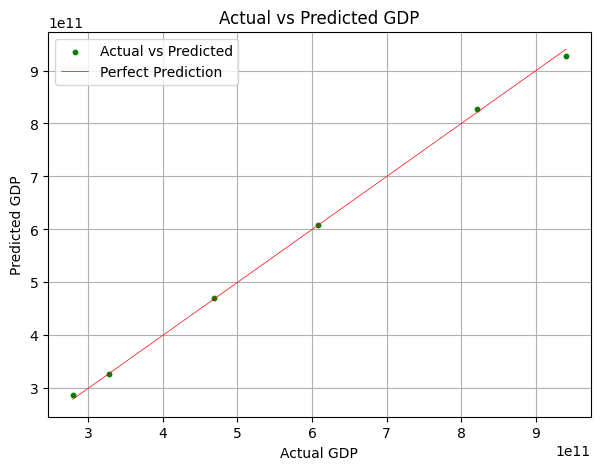


       Actual GDP  Predicted GDP  Percentage Error
9   4.683955e+11   4.704776e+11          0.444515
12  6.077007e+11   6.081166e+11          0.068444
2   2.792956e+11   2.878662e+11          3.068623
3   3.272748e+11   3.266090e+11          0.203441
15  9.402599e+11   9.268744e+11          1.423598
14  8.203838e+11   8.266285e+11          0.761200


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl as op
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

filepath = "/content/DOC-20250324-WA0010..xlsx"

try:
  df = pd.read_excel(filepath)
except FileNotFoundError:
  print(f"File not found: {filepath}")
except Exception as e:
  print(f"An error occurred: {e}")
  exit()

df = df.dropna()
features = ['C', 'G', 'I', 'NX']
target = 'GDP'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=89)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

r_squared = r2_score(y_test, y_pred)

print("---------------------------- Correlation Matrix --------------------------------")
print(df.corr())
print("-------------------------------------------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f"R-squared: {r_squared:.2f}")
print("-------------------------------------------------------------------------------")
intercept = model.intercept_
coefficients = model.coef_

equation = f"{target} = {intercept:.2f}"
for i, feature in enumerate(features):
    equation += f" + {coefficients[i]:.5f} * {feature}"

print("\nEquation: ",equation)
print("-------------------------------------------------------------------------------")
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, s=10, color='green', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red', linewidth=0.5, label='Perfect Prediction')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP')
plt.legend()
plt.grid(True)
plt.show()

results = pd.DataFrame({'Actual GDP': y_test, 'Predicted GDP': y_pred})
results['Percentage Error'] = np.abs((results['Actual GDP'] - results['Predicted GDP']) / results['Actual GDP']) * 100
print("\n",results)

In [ ]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3737.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           1.86e-18
Time:                        05:02:14   Log-Likelihood:                -424.33
No. Observations:                  17   AIC:                             858.7
Df Residuals:                      12   BIC:                             862.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.911e+10   2.74e+10      0.696      0.4

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
random_states = range(1, 101)
best_random_state = None
best_mse = float('inf')

for random_state in random_states:
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
       model = LinearRegression()
       model.fit(X_train, y_train)
       y_pred = model.predict(X_test)
       mse = mean_squared_error(y_test, y_pred)

       if mse < best_mse:
           best_mse = mse
           best_random_state = random_state

print(f"Best random_state: {best_random_state}, with MSE: {best_mse:.2f}")
print(f"R-squared: {r2_score(y_test, y_pred):.4f}")

Best random_state: 89, with MSE: 49429091479302610944.00
R-squared: 0.9983
